<a href="https://colab.research.google.com/github/giannayan/02_conditionals/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

State: California
Cases: 12169158
Deaths: 104277
Observed death rate: 0.008568957687951788

Sampling from Beta posterior...


100%|██████████| 100000/100000 [00:06<00:00, 15513.53it/s]



Simulating binomial outcomes...

Plotting posterior of p...


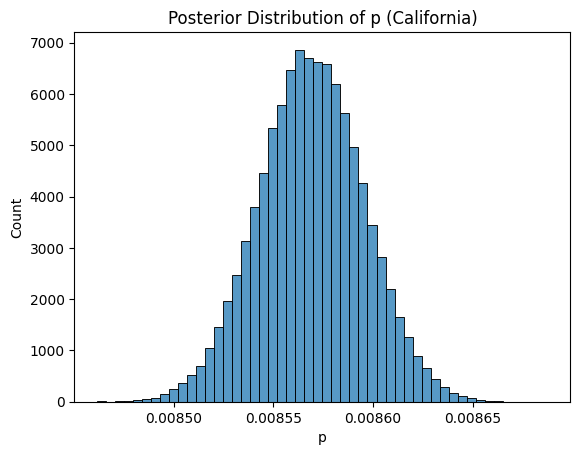


Plotting simulated deaths...


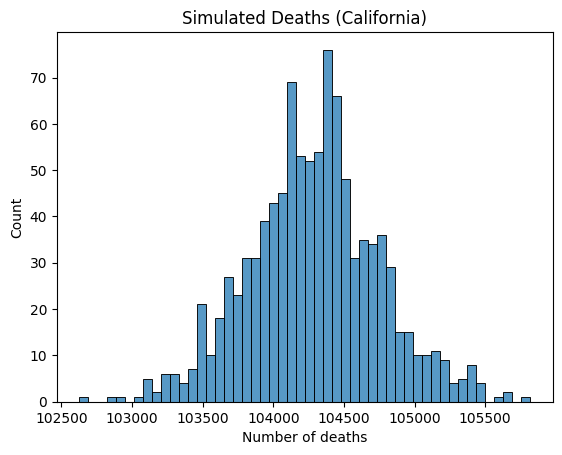


P(p > 0.02): 0.0

CLT PROBABILITY ANALYSIS

Observed deaths: 104277
Expected deaths (np): 104277.0
CLT approximation P(X >= observed): 0.5006203751234186

Comparing California vs Alaska...
P(p_California > p_Alaska): 1.0


In [7]:
# =========================
# IMPORTS (from Lecture 14: Beta code)
# =========================

import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import pandas as pd


# =========================
# LOAD REAL DATA
# =========================

def load_data():
    url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
    df = pd.read_csv(url)

    # get latest data for each state
    latest = df.sort_values("date").groupby("state").tail(1)

    return latest


# =========================
# GET DATA FOR ONE STATE
# =========================

def get_state_data(df, state_name):
    row = df[df["state"] == state_name].iloc[0]

    cases = int(row["cases"])
    deaths = int(row["deaths"])

    return cases, deaths


# ==================================================
# BETA POSTERIOR SAMPLING (from sumManyBetas.py)
# ==================================================

def sample_beta(deaths, cases):
    samples = []

    # Beta(1,1) prior
    alpha = 1 + deaths
    beta_param = 1 + (cases - deaths)

    print("\nSampling from Beta posterior...")

    for i in tqdm(range(100000)):
        p = stats.beta.rvs(alpha, beta_param)
        samples.append(p)

    return samples


# =========================
# BINOMIAL SIMULATION
# =========================

def simulate_binomial(beta_samples, cases):
    results = []

    print("\nSimulating binomial outcomes...")

    for i in range(1000):
        # randomly pick a p from posterior
        p = random.choice(beta_samples)

        # simulate deaths given that p
        X = stats.binom(cases, p)
        result = X.rvs()

        results.append(result)

    return results


# =========================
# COMPUTE PROBABILITY
# =========================

def compute_probability(beta_samples):
    count = 0

    for p in beta_samples:
        if p > 0.02:
            count += 1

    prob = count / len(beta_samples)

    print("\nP(p > 0.02):", prob)


# =========================
# CLT ANALYSIS
# =========================

def clt_analysis(deaths, cases):
    print("\nCLT PROBABILITY ANALYSIS\n")

    n = cases

    # estimate p using observed data
    p = deaths / cases

    # Binomial CLT: X~N(n *p, n*p(1-p))
    mean = n * p
    variance = n * p * (1 - p)
    std = np.sqrt(variance)

    # Normal approximation
    X = stats.norm(mean, std)

    # Use continuity correction by subtracting 0.5
    # P(X >= deaths)
    prob = 1 - X.cdf(deaths - 0.5)

    print("Observed deaths:", deaths)
    print("Expected deaths (np):", mean)
    print("CLT approximation P(X >= observed):", prob)


# ====================================
# PLOT RESULTS (from sumManyBetas.py)
# ====================================

def plot(beta_samples, binomial_samples, state):

    print("\nPlotting posterior of p...")
    sns.histplot(beta_samples, bins=50)
    plt.title(f"Posterior Distribution of p ({state})")
    plt.xlabel("p")
    plt.show()

    print("\nPlotting simulated deaths...")
    sns.histplot(binomial_samples, bins=50)
    plt.title(f"Simulated Deaths ({state})")
    plt.xlabel("Number of deaths")
    plt.show()


# =========================
# COMPARE TWO STATES
# =========================

def compare_states(df, state_A, state_B):
    cases_A, deaths_A = get_state_data(df, state_A)
    cases_B, deaths_B = get_state_data(df, state_B)

    aA = 1 + deaths_A
    bA = 1 + (cases_A - deaths_A)

    aB = 1 + deaths_B
    bB = 1 + (cases_B - deaths_B)

    print(f"\nComparing {state_A} vs {state_B}...")

    count = 0
    N = 100000

    for i in range(N):
        pA = stats.beta.rvs(aA, bA)
        pB = stats.beta.rvs(aB, bB)

        if pA > pB:
            count += 1

    prob = count / N

    print(f"P(p_{state_A} > p_{state_B}):", prob)


# =========================
# MAIN
# =========================

def main():
    state = "California"   # change this to try different states

    df = load_data()

    cases, deaths = get_state_data(df, state)

    print("State:", state)
    print("Cases:", cases)
    print("Deaths:", deaths)
    print("Observed death rate:", deaths / cases)

    # Beta posterior sampling
    beta_samples = sample_beta(deaths, cases)

    # Simulate binomial outcomes
    binomial_samples = simulate_binomial(beta_samples, cases)

    # Plot
    plot(beta_samples, binomial_samples, state)

    # Compute probability
    compute_probability(beta_samples)

    # CLT analysis
    clt_analysis(deaths, cases)

    # Comparison between states, feel free to change states
    compare_states(df, "California", "Alaska")


if __name__ == "__main__":
    main()